### STA 761 Research Project

### Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly import tools
import plotly.graph_objs as go

### Data Overview

In [2]:
#Read in the data
Bank_Data = pd.read_excel('C:\\Users\\deemp\\OneDrive\\Attachments\\STA 761\\Bank_Data.xlsx')

#Bank_Data = pd.read_excel('STA761_ResearchProject2024_Bank_Data.xlsx')

#How the data looks
Bank_Data.head

<bound method NDFrame.head of        customer_number  customer_age occupation marital_status  \
0                    1            20     admin.         single   
1                    2            20     admin.         single   
2                    3            21     admin.         single   
3                    4            21     admin.         single   
4                    5            21     admin.         single   
...                ...           ...        ...            ...   
45215            45210            78    unknown        married   
45216            45211            82    unknown       divorced   
45217            45212             0     admin.         single   
45218            45213           150    retired         single   
45219            45214            25     admin.         single   

       education_level loan_default  account_balance  account_overdraft_limit  \
0      secondaryschool           no               66                        0   
1      secondar

In [3]:
#Check data types
Bank_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45220 entries, 0 to 45219
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customer_number                  45220 non-null  int64  
 1   customer_age                     45220 non-null  int64  
 2   occupation                       45220 non-null  object 
 3   marital_status                   45220 non-null  object 
 4   education_level                  45220 non-null  object 
 5   loan_default                     45220 non-null  object 
 6   account_balance                  45220 non-null  int64  
 7   account_overdraft_limit          45220 non-null  int64  
 8   home_ownership                   45220 non-null  object 
 9   personal_loan                    45220 non-null  object 
 10  contact_type                     45220 non-null  object 
 11  contact_day                      45220 non-null  int64  
 12  contact_month     

### Data Cleaning 

In [4]:
#Check the number of missing values
print("Missing reords",Bank_Data.isnull().sum())


Missing reords customer_number                    0
customer_age                       0
occupation                         0
marital_status                     0
education_level                    0
loan_default                       0
account_balance                    0
account_overdraft_limit            0
home_ownership                     0
personal_loan                      0
contact_type                       0
contact_day                        0
contact_month                      0
contact_time_s                     0
contact_time_m                     0
contact_count_campaign             0
days_past_previous_campaign        0
contact_count_previous_campaign    0
take_up_previous_campaign          0
deposit_take_up                    0
dtype: int64


In [5]:
#Check for duplicated entries
num_duplicates = Bank_Data.duplicated().sum()
print(f"Number of duplicated records: {num_duplicates}")

Number of duplicated records: 6


In [6]:
#Remove duplicated entries
Bank_Data_2 = Bank_Data.drop_duplicates()

#Validate the removal of duplicates
num_duplicates = Bank_Data_2.duplicated().sum()
print(f"Number of duplicated records: {num_duplicates}")

Number of duplicated records: 0


In [7]:
Bank_Data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45214 entries, 0 to 45219
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customer_number                  45214 non-null  int64  
 1   customer_age                     45214 non-null  int64  
 2   occupation                       45214 non-null  object 
 3   marital_status                   45214 non-null  object 
 4   education_level                  45214 non-null  object 
 5   loan_default                     45214 non-null  object 
 6   account_balance                  45214 non-null  int64  
 7   account_overdraft_limit          45214 non-null  int64  
 8   home_ownership                   45214 non-null  object 
 9   personal_loan                    45214 non-null  object 
 10  contact_type                     45214 non-null  object 
 11  contact_day                      45214 non-null  int64  
 12  contact_month     

In [8]:
# Replace 'unknown' responses with NaN (in order to be identified as missing)
Bank_Data_2.replace('unknown', np.nan, inplace=True)

C:\Users\deemp\AppData\Local\Temp\ipykernel_2120\935811109.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [9]:
#Check  for missing values again
print("Missing reords",Bank_Data_2.isnull().sum())

Missing reords customer_number                        0
customer_age                           0
occupation                           288
marital_status                         0
education_level                     1857
loan_default                           0
account_balance                        0
account_overdraft_limit                0
home_ownership                         0
personal_loan                          0
contact_type                       13022
contact_day                            0
contact_month                          0
contact_time_s                         0
contact_time_m                         0
contact_count_campaign                 0
days_past_previous_campaign            0
contact_count_previous_campaign        0
take_up_previous_campaign          36962
deposit_take_up                        1
dtype: int64


In [10]:
#Missing data percentages %
print("Missing reords",(Bank_Data_2.isnull().sum()/len(Bank_Data_2))*100)

Missing reords customer_number                     0.000000
customer_age                        0.000000
occupation                          0.636971
marital_status                      0.000000
education_level                     4.107135
loan_default                        0.000000
account_balance                     0.000000
account_overdraft_limit             0.000000
home_ownership                      0.000000
personal_loan                       0.000000
contact_type                       28.800814
contact_day                         0.000000
contact_month                       0.000000
contact_time_s                      0.000000
contact_time_m                      0.000000
contact_count_campaign              0.000000
days_past_previous_campaign         0.000000
contact_count_previous_campaign     0.000000
take_up_previous_campaign          81.749016
deposit_take_up                     0.002212
dtype: float64


In [11]:
# Drop columns missing with over 20%
Bank_Data_2_dropped = Bank_Data_2.drop(columns=['contact_type', 'take_up_previous_campaign'])

In [12]:
Bank_Data_2_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45214 entries, 0 to 45219
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customer_number                  45214 non-null  int64  
 1   customer_age                     45214 non-null  int64  
 2   occupation                       44926 non-null  object 
 3   marital_status                   45214 non-null  object 
 4   education_level                  43357 non-null  object 
 5   loan_default                     45214 non-null  object 
 6   account_balance                  45214 non-null  int64  
 7   account_overdraft_limit          45214 non-null  int64  
 8   home_ownership                   45214 non-null  object 
 9   personal_loan                    45214 non-null  object 
 10  contact_day                      45214 non-null  int64  
 11  contact_month                    45214 non-null  object 
 12  contact_time_s    

In [13]:
#Handling Unrealistic Customer Age Range
# Define realistic age range (18 to 100)
min_age = 18
max_age = 100

# Filter out rows with unrealistic customer_age values
Bank_Data_3 = Bank_Data_2_dropped[(Bank_Data_2_dropped['customer_age'] >= min_age) & (Bank_Data_2_dropped['customer_age'] <= max_age)]

#Visualize the data
Bank_Data_3

,customer_number,customer_age,occupation,marital_status,education_level,loan_default,account_balance,account_overdraft_limit,home_ownership,personal_loan,contact_day,contact_month,contact_time_s,contact_time_m,contact_count_campaign,days_past_previous_campaign,contact_count_previous_campaign,deposit_take_up
0,1,20,admin.,single,secondaryschool,no,66,0,yes,no,19,jun,75,1.250000,2,-1,0,no
1,2,20,admin.,single,secondaryschool,no,336,0,no,yes,5,jun,133,2.216667,1,-1,0,no
2,3,21,admin.,single,secondaryschool,no,325,0,yes,no,16,may,467,7.783333,1,-1,0,no
3,4,21,admin.,single,NaN,no,-28,100,yes,no,27,may,125,2.083333,1,-1,0,no
4,5,21,admin.,single,highereducation,no,242,0,no,yes,26,mar,131,2.183333,4,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45213,45208,77,NaN,married,NaN,no,397,0,no,no,7,may,300,5.000000,3,-1,0,yes
45214,45209,77,NaN,married,NaN,no,397,0,no,no,8,nov,207,3.450000,1,185,3,no
45215,45210,78,NaN,married,NaN,no,2235,0,no,no,14,apr,300,5.000000,3,-1,0,yes
45216,45211,82,NaN,divorced,NaN,no,0,0,no,no,9,sep,277,4.616667,5,-1,0,no


In [14]:
#Correcting the months to be written in the same way
# Replace 'june' with 'jun'
Bank_Data_3['contact_month'] = Bank_Data_3['contact_month'].replace('june', 'jun')

#Output
Bank_Data_3

C:\Users\deemp\AppData\Local\Temp\ipykernel_2120\227188231.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,customer_number,customer_age,occupation,marital_status,education_level,loan_default,account_balance,account_overdraft_limit,home_ownership,personal_loan,contact_day,contact_month,contact_time_s,contact_time_m,contact_count_campaign,days_past_previous_campaign,contact_count_previous_campaign,deposit_take_up
0,1,20,admin.,single,secondaryschool,no,66,0,yes,no,19,jun,75,1.250000,2,-1,0,no
1,2,20,admin.,single,secondaryschool,no,336,0,no,yes,5,jun,133,2.216667,1,-1,0,no
2,3,21,admin.,single,secondaryschool,no,325,0,yes,no,16,may,467,7.783333,1,-1,0,no
3,4,21,admin.,single,NaN,no,-28,100,yes,no,27,may,125,2.083333,1,-1,0,no
4,5,21,admin.,single,highereducation,no,242,0,no,yes,26,mar,131,2.183333,4,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45213,45208,77,NaN,married,NaN,no,397,0,no,no,7,may,300,5.000000,3,-1,0,yes
45214,45209,77,NaN,married,NaN,no,397,0,no,no,8,nov,207,3.450000,1,185,3,no
45215,45210,78,NaN,married,NaN,no,2235,0,no,no,14,apr,300,5.000000,3,-1,0,yes
45216,45211,82,NaN,divorced,NaN,no,0,0,no,no,9,sep,277,4.616667,5,-1,0,no


##### Summary Statistics of the Data

In [15]:
# Calculate summary statistics
summary_statistics = Bank_Data_3.describe()

print(summary_statistics)

       customer_number  customer_age  account_balance  \
count     45212.000000  45212.000000     45212.000000   
mean      22606.500044     40.935858      1362.251946   
std       13051.724599     10.618909      3044.735159   
min           1.000000     18.000000     -8019.000000   
25%       11303.750000     33.000000        72.000000   
50%       22606.500000     39.000000       448.000000   
75%       33909.250000     48.000000      1428.000000   
max       45214.000000     95.000000    102127.000000   

       account_overdraft_limit   contact_day  contact_time_s  contact_time_m  \
count             45212.000000  45212.000000    45212.000000    45212.000000   
mean                 67.059630     15.806401      258.169844        4.302831   
std                 267.443862      8.322385      257.528981        4.292150   
min                   0.000000      1.000000        0.000000        0.000000   
25%                   0.000000      8.000000      103.000000        1.716667   
50%   

In [16]:
#Set the negative values of 'days past previous campaign' to zero
Bank_Data_3['days_past_previous_campaign'] = Bank_Data_3['days_past_previous_campaign'].apply(lambda x: max(x, 0))

#Visualize the data
Bank_Data_3

C:\Users\deemp\AppData\Local\Temp\ipykernel_2120\3372298820.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,customer_number,customer_age,occupation,marital_status,education_level,loan_default,account_balance,account_overdraft_limit,home_ownership,personal_loan,contact_day,contact_month,contact_time_s,contact_time_m,contact_count_campaign,days_past_previous_campaign,contact_count_previous_campaign,deposit_take_up
0,1,20,admin.,single,secondaryschool,no,66,0,yes,no,19,jun,75,1.250000,2,0,0,no
1,2,20,admin.,single,secondaryschool,no,336,0,no,yes,5,jun,133,2.216667,1,0,0,no
2,3,21,admin.,single,secondaryschool,no,325,0,yes,no,16,may,467,7.783333,1,0,0,no
3,4,21,admin.,single,NaN,no,-28,100,yes,no,27,may,125,2.083333,1,0,0,no
4,5,21,admin.,single,highereducation,no,242,0,no,yes,26,mar,131,2.183333,4,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45213,45208,77,NaN,married,NaN,no,397,0,no,no,7,may,300,5.000000,3,0,0,yes
45214,45209,77,NaN,married,NaN,no,397,0,no,no,8,nov,207,3.450000,1,185,3,no
45215,45210,78,NaN,married,NaN,no,2235,0,no,no,14,apr,300,5.000000,3,0,0,yes
45216,45211,82,NaN,divorced,NaN,no,0,0,no,no,9,sep,277,4.616667,5,0,0,no


In [17]:
Bank_Data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45212 entries, 0 to 45219
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customer_number                  45212 non-null  int64  
 1   customer_age                     45212 non-null  int64  
 2   occupation                       44924 non-null  object 
 3   marital_status                   45212 non-null  object 
 4   education_level                  43355 non-null  object 
 5   loan_default                     45212 non-null  object 
 6   account_balance                  45212 non-null  int64  
 7   account_overdraft_limit          45212 non-null  int64  
 8   home_ownership                   45212 non-null  object 
 9   personal_loan                    45212 non-null  object 
 10  contact_day                      45212 non-null  int64  
 11  contact_month                    45212 non-null  object 
 12  contact_time_s    

##### Imputation for missing data

In [18]:
#Median imputation for non-numerical data
# Select categorical columns
categorical_cols = ['deposit_take_up', 'occupation', 'education_level']

# Impute missing values with mode
Bank_Data_3[categorical_cols] = Bank_Data_3[categorical_cols].fillna(Bank_Data_3[categorical_cols].mode().iloc[0])

#Visualize output
Bank_Data_3


C:\Users\deemp\AppData\Local\Temp\ipykernel_2120\2438918264.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,customer_number,customer_age,occupation,marital_status,education_level,loan_default,account_balance,account_overdraft_limit,home_ownership,personal_loan,contact_day,contact_month,contact_time_s,contact_time_m,contact_count_campaign,days_past_previous_campaign,contact_count_previous_campaign,deposit_take_up
0,1,20,admin.,single,secondaryschool,no,66,0,yes,no,19,jun,75,1.250000,2,0,0,no
1,2,20,admin.,single,secondaryschool,no,336,0,no,yes,5,jun,133,2.216667,1,0,0,no
2,3,21,admin.,single,secondaryschool,no,325,0,yes,no,16,may,467,7.783333,1,0,0,no
3,4,21,admin.,single,secondaryschool,no,-28,100,yes,no,27,may,125,2.083333,1,0,0,no
4,5,21,admin.,single,highereducation,no,242,0,no,yes,26,mar,131,2.183333,4,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45213,45208,77,tradeworker,married,secondaryschool,no,397,0,no,no,7,may,300,5.000000,3,0,0,yes
45214,45209,77,tradeworker,married,secondaryschool,no,397,0,no,no,8,nov,207,3.450000,1,185,3,no
45215,45210,78,tradeworker,married,secondaryschool,no,2235,0,no,no,14,apr,300,5.000000,3,0,0,yes
45216,45211,82,tradeworker,divorced,secondaryschool,no,0,0,no,no,9,sep,277,4.616667,5,0,0,no


In [19]:
#Drop customer number

Bank_Data_5 = Bank_Data_3.drop(columns=['customer_number'])

Bank_Data_5.head()

,customer_age,occupation,marital_status,education_level,loan_default,account_balance,account_overdraft_limit,home_ownership,personal_loan,contact_day,contact_month,contact_time_s,contact_time_m,contact_count_campaign,days_past_previous_campaign,contact_count_previous_campaign,deposit_take_up
0,20,admin.,single,secondaryschool,no,66,0,yes,no,19,jun,75,1.250000,2,0,0,no
1,20,admin.,single,secondaryschool,no,336,0,no,yes,5,jun,133,2.216667,1,0,0,no
2,21,admin.,single,secondaryschool,no,325,0,yes,no,16,may,467,7.783333,1,0,0,no
3,21,admin.,single,secondaryschool,no,-28,100,yes,no,27,may,125,2.083333,1,0,0,no
4,21,admin.,single,highereducation,no,242,0,no,yes,26,mar,131,2.183333,4,0,0,no


#### Exploratory Data Analysis

In [20]:
def grab_column_names(dataframe, categorical_threshold=10, cardinality_threshold=20):


    # Extracting categorical columns
    categorical_columns = [column for column in dataframe.columns if dataframe[column].dtype == "O"]

    # Extracting numerical columns that behave like categorical
    numerical_but_categorical = [column for column in dataframe.columns if dataframe[column].nunique() < categorical_threshold
                                 and dataframe[column].dtype != "O"]

    # Extracting numerical columns
    numerical_columns = [column for column in dataframe.columns if dataframe[column].dtype != "O"]
    numerical_columns = [column for column in numerical_columns if column not in numerical_but_categorical]

    # Printing summary information
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'Categorical Columns: {len(categorical_columns)}')
    print(f'Numerical Columns: {len(numerical_columns)}')
    print(f'Numerical but Categorical Columns: {len(numerical_but_categorical)}')

    return categorical_columns,numerical_but_categorical, numerical_columns

# Usage:
categorical_columns,numerical_but_categorical,numerical_columns = grab_column_names(Bank_Data_5)

Observations: 45212
Variables: 17
Categorical Columns: 8
Numerical Columns: 8
Numerical but Categorical Columns: 1


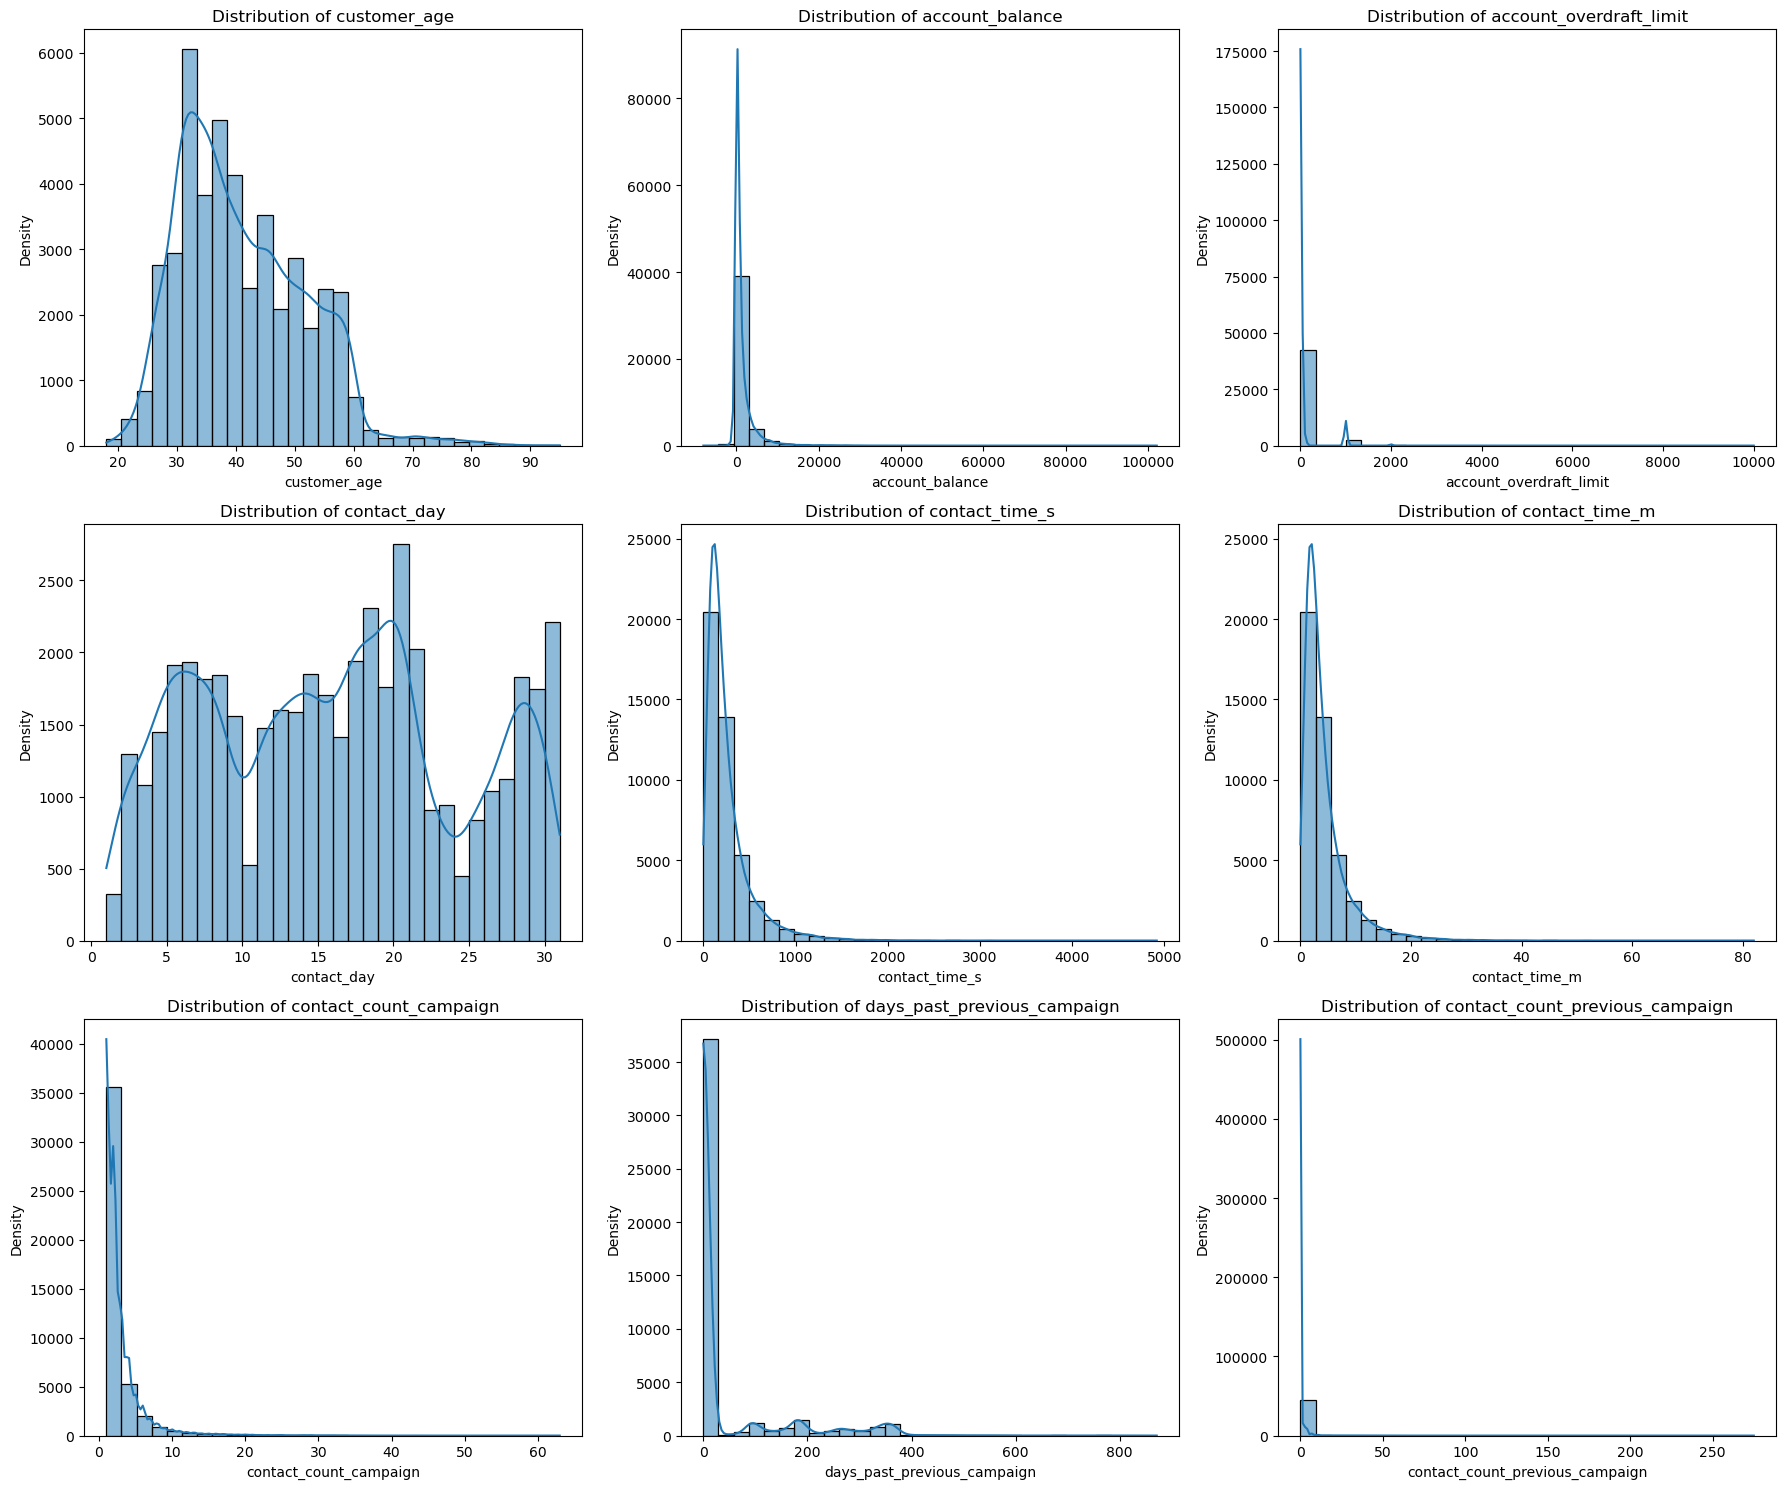

In [21]:
# Select numerical columns
numerical_columns = Bank_Data_5.select_dtypes(include=['float64', 'int64']).columns

# Set up the number of rows and columns for the plots
num_plots = len(numerical_columns)
num_rows = (num_plots // 3) + (num_plots % 3 > 0)

# Create the subplots
plt.figure(figsize=(18, num_rows * 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(Bank_Data_5[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

distribution of customer_age:

The age distribution is right-skewed, with most customers falling between the ages of 20 to 60, peaking around 30-35. There are fewer customers above 60, which is common in many datasets where older age groups are underrepresented.
Distribution of account_balance:

This distribution is highly right-skewed, with a large number of customers having a lower account balance. A few customers have significantly higher balances, leading to a long tail on the right side.
Distribution of account_overdraft_limit:

The overdraft limit also shows a strong right-skew, with most customers having little to no overdraft limit. A small number of customers have a much higher limit.
Distribution of contact_day:

The contact days are somewhat uniformly distributed across the month, with slight peaks on certain days, possibly indicating specific days when customers are more likely to be contacted.
Distribution of contact_time_s:

The time spent on contact in seconds shows a sharp right-skew, with most contacts being brief and a few extending to longer durations.
Distribution of contact_time_m:

Similarly, when contact time is measured in minutes, the distribution remains right-skewed, with most contacts being very short and only a few extending beyond a few minutes.
Distribution of contact_count_campaign:

The number of contacts per campaign is right-skewed, with most customers being contacted only a few times, and very few contacted multiple times. This is typical in marketing campaigns where most contacts do not require repeated outreach.
Distribution of days_past_previous_campaign:

This variable shows a right-skewed distribution, with most customers having a short interval since the last campaign, and a few having a much longer gap.
Distribution of contact_count_previous_campaign:

This distribution is extremely right-skewed, with most customers having no or very few previous contacts. A very small number of customers have a high number of contacts from previous campaigns.
Overall Insights:
Right-skewness: Most variables exhibit right-skewness, indicating that the majority of data points are clustered at lower values with fewer high-value outliers. This is common in financial and marketing data.
Uniformity in Contact Days: The contact day variable shows some uniformity, which might suggest an equal distribution of marketing efforts across the month.

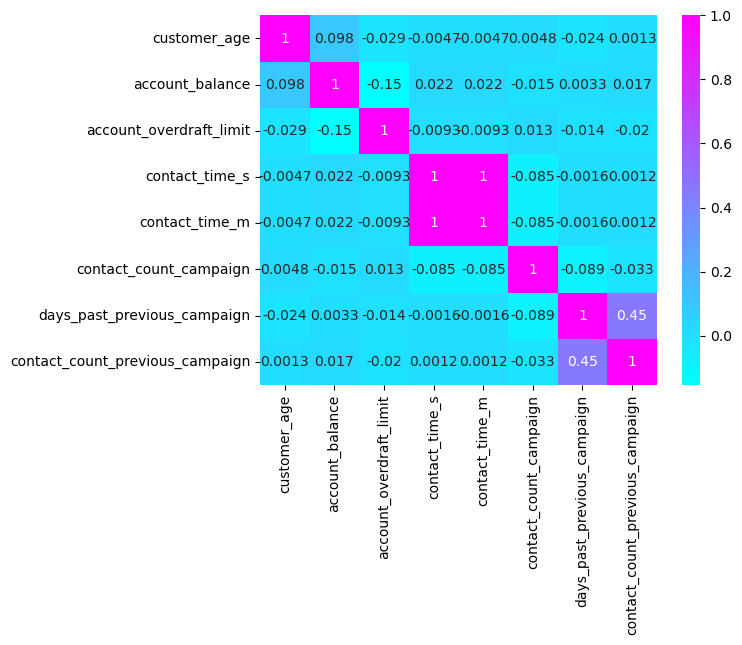

In [22]:
# Create list of numerical columns
numerical_columns = [
    'customer_age', 'account_balance', 'account_overdraft_limit', 
    'contact_time_s', 'contact_time_m', 'contact_count_campaign', 
    'days_past_previous_campaign', 'contact_count_previous_campaign']

# Correlation matrix
correlation_matrix = Bank_Data_5[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='cool')
plt.show()

In [23]:
Bank_Data_5.drop(['contact_time_s' ], axis=1, inplace=True)

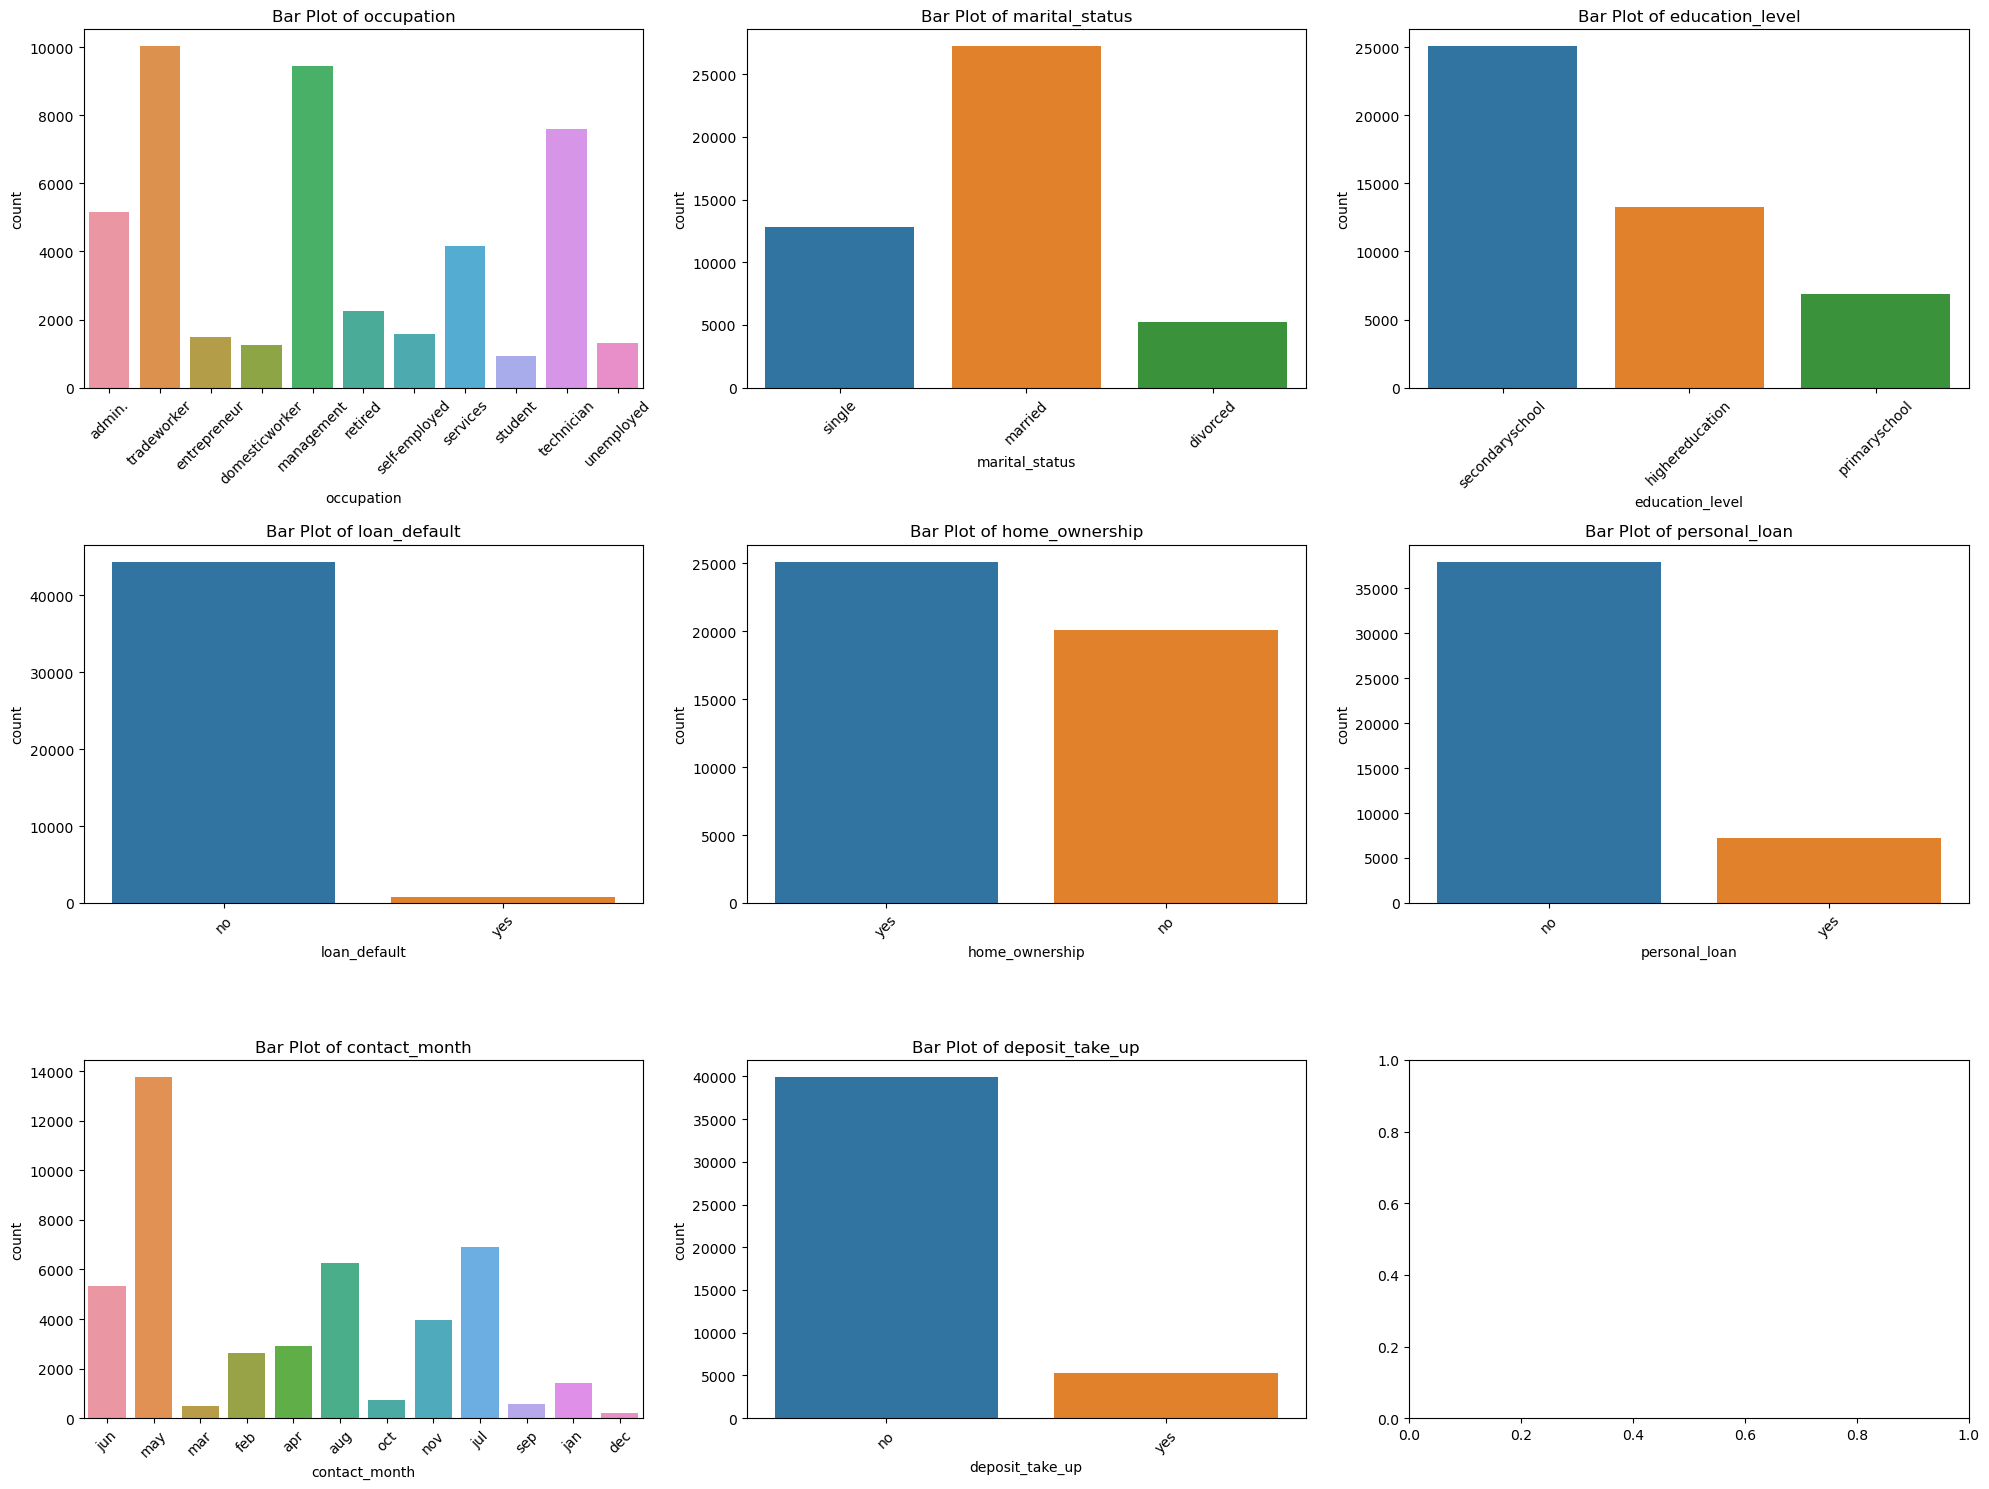

In [24]:
#Visualise categorical features
# Create list of categorical columns
categorical_columns = [
    'occupation', 'marital_status', 'education_level', 'loan_default', 
    'home_ownership', 'personal_loan', 'contact_month',  'deposit_take_up'
]
# Create subplots
n_cols = 3  # Number of columns in the grid
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Number of rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows), squeeze=False)

# Plot each categorical variable
for i, column in enumerate(categorical_columns):
    ax = axes[i // n_cols, i % n_cols]
    if column in Bank_Data_5.columns:
        sns.countplot(x=column, data=Bank_Data_5, ax=ax)
        ax.set_title(f'Bar Plot of {column}')
        ax.tick_params(axis='x', rotation=45)
    else:
        ax.text(0.5, 0.5, f"'{column}' not found", ha='center', va='center')

# Adjust layout
plt.tight_layout()

# Output
plt.show()

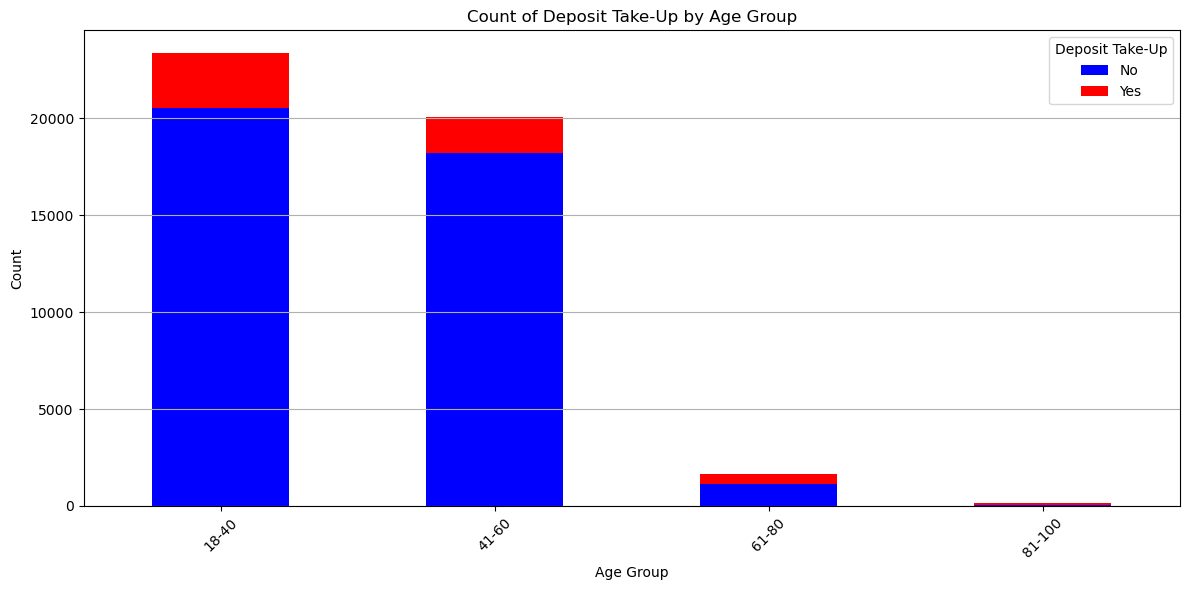

In [25]:
# Create bins for customer age
bins = [18, 40, 60, 80, 100]
bin_labels = ['18-40', '41-60', '61-80', '81-100']
#Bin the age data 
Bank_Data_5['age_group'] = pd.cut(Bank_Data_5['customer_age'], bins=bins, labels=bin_labels, right=False)

# Count occurrences of deposit_take_up for each age group
count_age_deposit = pd.crosstab(Bank_Data_5['age_group'], Bank_Data_5['deposit_take_up'])

# Plot the data
count_age_deposit.plot(kind='bar', stacked=True, figsize=(12, 6), color=['blue', 'red'])

# Customize the plot
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count of Deposit Take-Up by Age Group')
plt.xticks(rotation=45)
plt.legend(title='Deposit Take-Up', labels=['No', 'Yes'])
plt.grid(axis='y')
plt.tight_layout()

# Visualize the Output
plt.show()

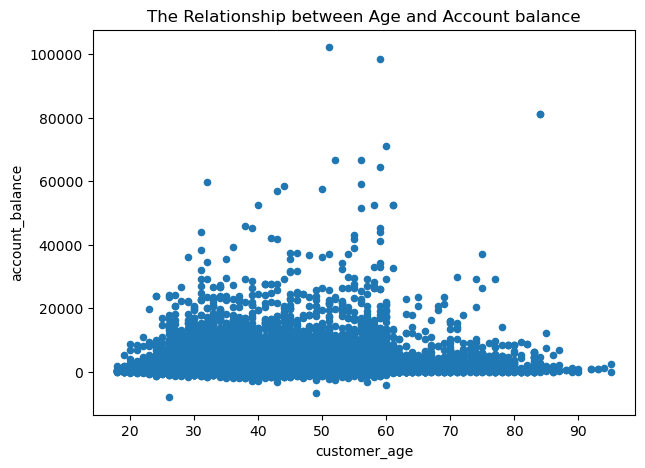

In [26]:
#Scatterplot of age vs account_balance
Scatter_age_contact_time = Bank_Data_5.plot.scatter('customer_age','account_balance',figsize = (7,5))

plt.title('The Relationship between Age and Account balance')
plt.show()

#### Encoding categorical variables

In [27]:
Bank_Data_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45212 entries, 0 to 45219
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   customer_age                     45212 non-null  int64   
 1   occupation                       45212 non-null  object  
 2   marital_status                   45212 non-null  object  
 3   education_level                  45212 non-null  object  
 4   loan_default                     45212 non-null  object  
 5   account_balance                  45212 non-null  int64   
 6   account_overdraft_limit          45212 non-null  int64   
 7   home_ownership                   45212 non-null  object  
 8   personal_loan                    45212 non-null  object  
 9   contact_day                      45212 non-null  int64   
 10  contact_month                    45212 non-null  object  
 11  contact_time_m                   45212 non-null  float64 
 12  cont

In [28]:
# Encode categorical variables
categorical_columns = [
    'occupation',
    'marital_status',
    'education_level',
    'loan_default',
    'home_ownership',
    'personal_loan',]

# Create dummy variables
Bank_Data_5= pd.get_dummies(Bank_Data_5, columns=categorical_columns, drop_first=True)

# For binary target use label encoding
Bank_Data_5['deposit_take_up'] = Bank_Data_5['deposit_take_up'].map({'no': 0, 'yes': 1})

In [29]:
#Encoding the target variable
from sklearn.preprocessing import OrdinalEncoder
#Create an instance of OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the 'contact_month' column(ordered )
Bank_Data_5['contact_month_encoded'] = encoder.fit_transform(Bank_Data_5[['contact_month']])

# Drop the 'contact_month' column
Bank_Data_5 = Bank_Data_5.drop(columns=['contact_month'])

In [30]:
Bank_Data_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45212 entries, 0 to 45219
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   customer_age                     45212 non-null  int64   
 1   account_balance                  45212 non-null  int64   
 2   account_overdraft_limit          45212 non-null  int64   
 3   contact_day                      45212 non-null  int64   
 4   contact_time_m                   45212 non-null  float64 
 5   contact_count_campaign           45212 non-null  int64   
 6   days_past_previous_campaign      45212 non-null  int64   
 7   contact_count_previous_campaign  45212 non-null  int64   
 8   deposit_take_up                  45212 non-null  int64   
 9   age_group                        45212 non-null  category
 10  occupation_domesticworker        45212 non-null  uint8   
 11  occupation_entrepreneur          45212 non-null  uint8   
 12  occu

In [31]:
#Drop age group (categorical)
Bank_Data_5.drop(['age_group' ], axis=1, inplace=True)

In [32]:
Bank_Data_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45212 entries, 0 to 45219
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customer_age                     45212 non-null  int64  
 1   account_balance                  45212 non-null  int64  
 2   account_overdraft_limit          45212 non-null  int64  
 3   contact_day                      45212 non-null  int64  
 4   contact_time_m                   45212 non-null  float64
 5   contact_count_campaign           45212 non-null  int64  
 6   days_past_previous_campaign      45212 non-null  int64  
 7   contact_count_previous_campaign  45212 non-null  int64  
 8   deposit_take_up                  45212 non-null  int64  
 9   occupation_domesticworker        45212 non-null  uint8  
 10  occupation_entrepreneur          45212 non-null  uint8  
 11  occupation_management            45212 non-null  uint8  
 12  occupation_retired

### Model Development

#### Splitting Data into Train and Test

In [36]:
from sklearn.model_selection import train_test_split
# Define the target variable and predictor variables
X = Bank_Data_5.drop(['deposit_take_up'], axis=1)
y = Bank_Data_5['deposit_take_up']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(Bank_Data_5.drop('deposit_take_up',axis=1), 
                                                    Bank_Data_5['deposit_take_up'], test_size=0.30, 
                                                    random_state=101)

#### Model 1: Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logmodel = LogisticRegression()
M = logmodel.fit(X_train,y_train)

C:\Users\deemp\anaconda3\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [40]:
predictions = logmodel.predict(X_test)

In [41]:
import statsmodels.api as sm

glm = sm.GLM(y_train,
X_train,
family=sm.families.Binomial())
results = glm.fit()

In [42]:
results

In [43]:
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        deposit_take_up   No. Observations:                31648
Model:                            GLM   Df Residuals:                    31622
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8742.6
Date:                Thu, 29 Aug 2024   Deviance:                       17485.
Time:                        19:37:22   Pearson chi2:                 3.97e+08
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1605
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
customer_a

In [44]:
significant_vars = results.pvalues[results.pvalues < 0.05].index.tolist()
print("Significant variables at alpha = 0.05:")
print(significant_vars)

Significant variables at alpha = 0.05:
['customer_age', 'account_balance', 'account_overdraft_limit', 'contact_day', 'contact_time_m', 'contact_count_campaign', 'days_past_previous_campaign', 'contact_count_previous_campaign', 'occupation_domesticworker', 'occupation_entrepreneur', 'occupation_management', 'occupation_retired', 'occupation_self-employed', 'occupation_services', 'occupation_technician', 'occupation_tradeworker', 'occupation_unemployed', 'marital_status_married', 'marital_status_single', 'education_level_primaryschool', 'education_level_secondaryschool', 'home_ownership_yes', 'personal_loan_yes', 'contact_month_encoded']


##### Logistic Regression  Validation and Evaluation

In [45]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     12022
           1       0.52      0.19      0.28      1542

    accuracy                           0.89     13564
   macro avg       0.71      0.58      0.61     13564
weighted avg       0.86      0.89      0.86     13564



In [47]:
print("The accuracy of the model is: ", metrics.accuracy_score(predictions,y_test)*100, "%")

The accuracy of the model is:  88.81598348569743 %


In [61]:
# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Variable to store the best model and its mean cross-validation score
best_cv_score = 0
best_model = None

# Perform cross-validation
for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Fit the model on the training fold
    glm = sm.GLM(y_train_fold, X_train_fold, family=sm.families.Binomial())
    results = glm.fit()
    
    # Predict on the validation fold
    y_pred_prob = results.predict(X_test_fold)
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    # Calculate the accuracy on the validation fold
    fold_accuracy = accuracy_score(y_test_fold, y_pred)
    
    # Check if this is the best model so far
    if fold_accuracy > best_cv_score:
        best_cv_score = fold_accuracy
        best_model = results

# Now best_model contains the best cross-validated model
print(f"Best Cross-Validated Model's Accuracy on Validation Folds: {best_cv_score}")



Best Cross-Validated Model's Accuracy on Validation Folds: 0.8921011058451817


In [63]:
#Cross validation for better model fit
# Predict on the training data
y_train_pred_prob = best_results_final.predict(X_train)
y_train_pred = (y_train_pred_prob > 0.5).astype(int)

# Calculate and print the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

# Predict on the test data
y_test_pred_prob = best_results_final.predict(X_test)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

# Calculate and print the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")


Training Accuracy: 0.8884289686552073
Test Accuracy: 0.8942052491890298


In [79]:
#Evaluation using ROC index
# Get the probability scores for the positive class from the best logistic regression model
y_prob_glm = best_model.predict(X_test)

# Calculate the ROC AUC score
roc_auc_glm = roc_auc_score(y_test, y_prob_glm)
print(f'ROC AUC Score (GLM): {roc_auc_glm:.2f}')

ROC AUC Score (GLM): 0.86


In [64]:
# Refit the best model on the entire training dataset
best_glm_final = sm.GLM(y_train, X_train, family=sm.families.Binomial())
best_results_final = best_glm_final.fit()

# Print the summary of the best model
print(best_results_final.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        deposit_take_up   No. Observations:                31648
Model:                            GLM   Df Residuals:                    31622
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8742.6
Date:                Thu, 29 Aug 2024   Deviance:                       17485.
Time:                        19:48:35   Pearson chi2:                 3.97e+08
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1605
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
customer_a

#### Model 2:Decision tree

In [66]:
import pandas as pd
from sklearn.metrics import classification_report
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, GridSearchCV

In [67]:
#Train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

##### Decision Tree Validation and Evaluation

In [68]:
# Predictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Evaluate model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 1.0
Testing Accuracy: 0.8682542023002064


In [69]:
#Reduce overfitting with k-fold cross-validation
# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Use cross-validation to evaluate the initial model
cv_scores = cross_val_score(clf, X, y, cv=5)
print(f"Initial CV scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean()}")

# Set up a parameter grid to tune hyperparameters for pruning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Get the best model after grid search
best_clf = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# Evaluate the best model using cross-validation
best_cv_scores = cross_val_score(best_clf, X, y, cv=5)
print(f"Best model CV scores: {best_cv_scores}")
print(f"Mean best model CV score: {best_cv_scores.mean()}")

# Fit the best model on the entire dataset (optional, depending on the use case)
best_clf.fit(X, y)


Initial CV scores: [0.87404622 0.86453611 0.26211015 0.69508958 0.87071444]
Mean CV score: 0.7132993014304606
Best parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best model CV scores: [0.89848502 0.88709499 0.26034063 0.7235125  0.89239106]
Mean best model CV score: 0.7323648400794817


DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=10)

In [70]:
from sklearn.metrics import accuracy_score

# Predict on the training data
y_train_pred = best_clf.predict(X_train)

# Calculate the accuracy on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")


# Predict on the test data
y_test_pred = best_clf.predict(X_test)

# Calculate the accuracy on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.904196157735086
Test Accuracy: 0.9048953111176644


                            Feature  Importance
4                    contact_time_m    0.560724
25            contact_month_encoded    0.133120
23               home_ownership_yes    0.104973
6       days_past_previous_campaign    0.097830
0                      customer_age    0.043894
1                   account_balance    0.017220
7   contact_count_previous_campaign    0.012202
3                       contact_day    0.011101
18           marital_status_married    0.007558
5            contact_count_campaign    0.004750
16           occupation_tradeworker    0.001794
24                personal_loan_yes    0.001206
14               occupation_student    0.001123
21  education_level_secondaryschool    0.000882
12         occupation_self-employed    0.000822
11               occupation_retired    0.000542
13              occupation_services    0.000260
17            occupation_unemployed    0.000000
10            occupation_management    0.000000
19            marital_status_single    0

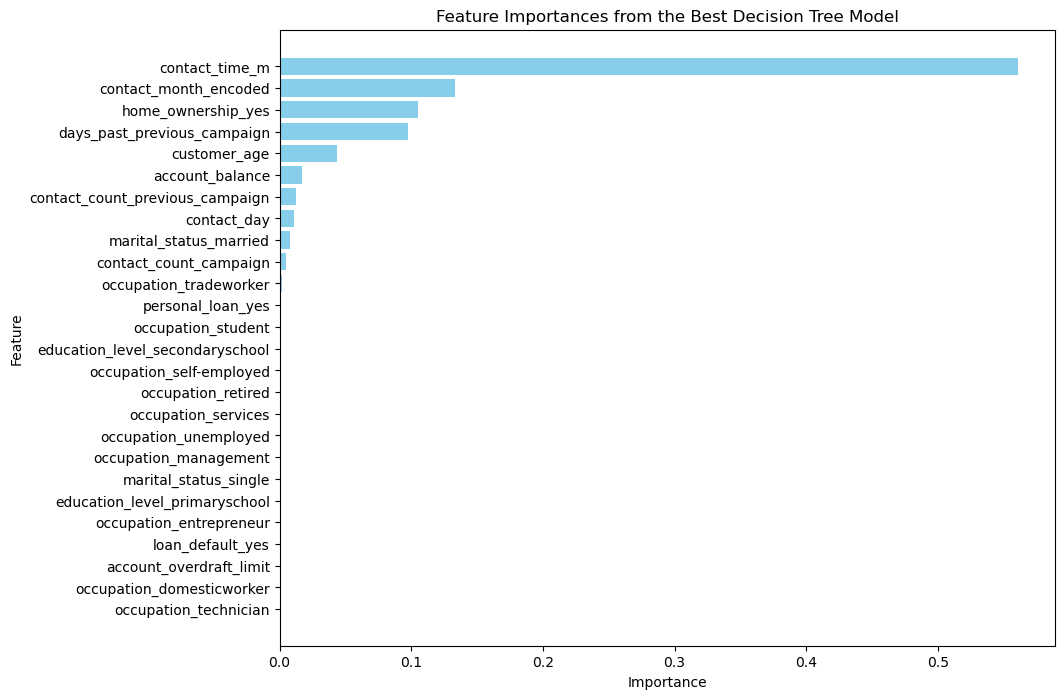

In [71]:
 X = Bank_Data_5.drop(columns=['deposit_take_up'])
feature_names = X.columns

# Extract feature importances from the best model
feature_importances = best_clf.feature_importances_

# Create a DataFrame to organize and sort the feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from the Best Decision Tree Model')
plt.gca().invert_yaxis()  # To have the most important feature at the top
plt.show()

In [74]:
# Precision of the cross validated model
#Make predictions using the best decision tree model
predictions = best_clf.predict(X_test)

# Import necessary metrics from sklearn
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Print the classification report for precision, recall, F1-score, and support
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11978
           1       0.55      0.40      0.46      1586

    accuracy                           0.89     13564
   macro avg       0.73      0.68      0.70     13564
weighted avg       0.88      0.89      0.88     13564



In [76]:
#Evaluation using ROC Index
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Get the probability scores for the positive class
y_prob = best_clf.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC Score: {roc_auc:.2f}')

ROC AUC Score: 0.87


#### Model Comparison